In [1]:
import numpy as np
import networkx as nx
import rdkit.Chem.AllChem as AllChem
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from matplotlib.pyplot import imshow, show
import sys

In [2]:
class DepsiPeptide:
    def __init__():
        self.structure = None
        self.parts = None
        
    def read(inp, format='smile'):
        pass

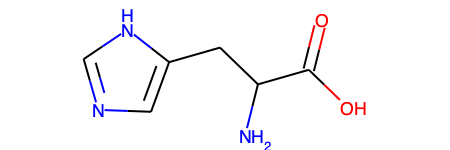

In [3]:
Chem.MolFromSmiles('C1=C(NC=N1)CC(C(=O)O)N')

In [4]:
names = [
    'FullName',
    'ShortName',
    'Letter',
    'MF',
    'SMILE',
]
aminoacids = pd.read_csv('data.txt', header=None, names=names, sep='\t')

In [5]:
fragments_db = []
for i in aminoacids.index:
    
    mol = Chem.MolFromSmiles(aminoacids.SMILE[i])
    fragments_db.append((mol, aminoacids.FullName[i]))
    #Chem.Draw.MolToImageFile( mol, '{}.png'.format(aminoacids.FullName[i]))

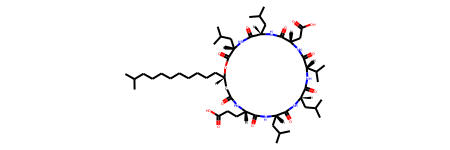

In [119]:
m = Chem.MolFromSmiles('CC(C)CCCCCCCCC[C@@H]1CC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](C(=O)N[C@H](C(=O)O1)CC(C)C)CC(C)C)CC(=O)O)C(C)C)CC(C)C)CC(C)C)CCC(=O)O', sanitize=False)
m



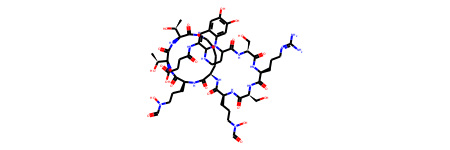

In [121]:
m = Chem.MolFromSmiles('C[C@H]([C@H]1C(=O)N[C@H](C(=O)NCCCC[C@@H](C(=O)N[C@H](C(=O)N1)CCCN(C=O)O)NC(=O)[C@H](CCCN(C=O)O)NC(=O)[C@@H](CO)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H](CO)NC(=O)C2CCNC3N2C4=CC(=C(C=C4C=C3NC(=O)CCC(=O)O)O)O)[C@@H](C)O)O')
m

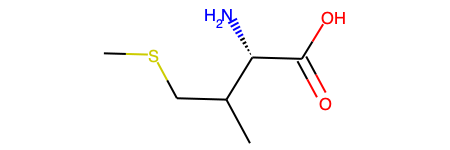

In [134]:
l = Chem.MolFromSmiles('C(CC)(C)[C@@H](C(=O)O)N')
l


In [130]:
modifications = ['C[CH3]', 'C[OH]', 'C[NH2]', 'C[PH2]', 'C[SH]', 'C[Cl]', 'C[I]', 'C[Br]', 'C[F]']
modifications_mol = []
for i in modifications:
    modifications_mol.append(Chem.MolFromSmiles(i))


Threonine


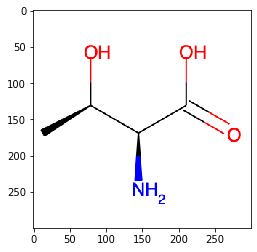

Threonine


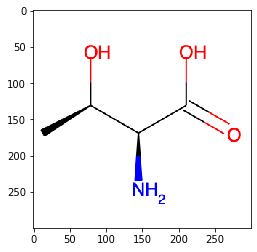

Lysine


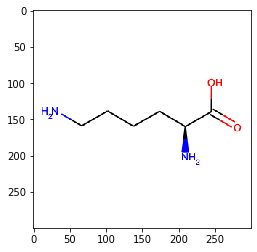

Alanine


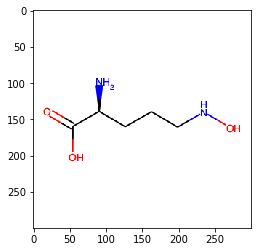

The <rdkit.Chem.rdchem.Mol object at 0x7f9095a3edb0> substract is not in base
Alanine


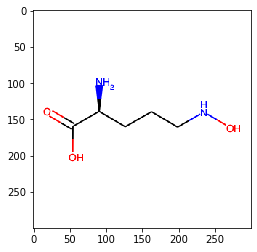

The <rdkit.Chem.rdchem.Mol object at 0x7f9095a3ee70> substract is not in base
Serine


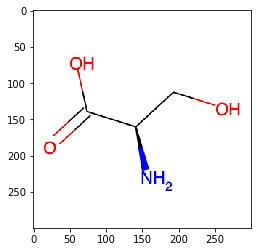

Arginine


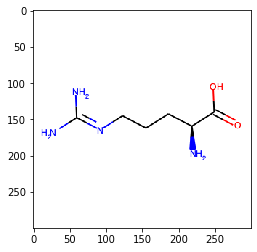

Serine


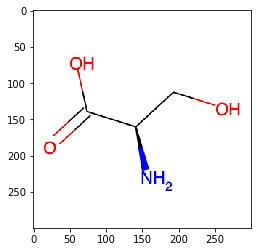

Alanine


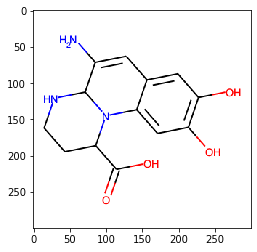

The <rdkit.Chem.rdchem.Mol object at 0x7f909639d090> substract is not in base
Methionine
Modificated with CH3- radical


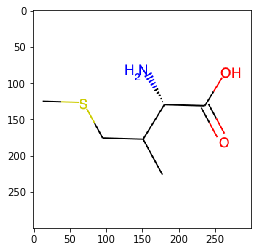

In [139]:
peptide_bond = Chem.MolFromSmiles('C(=O)NC')
ester_bond = Chem.MolFromSmiles('C(=O)OC')
peptide_ids = m.GetSubstructMatches(peptide_bond)
ester_ids = m.GetSubstructMatches(ester_bond)

nm = Chem.EditableMol(m)    

bond_ids = []
for x, _, y, _ in peptide_ids:
    nm.RemoveBond(x,y)
    bond_ids.append(nm.AddBond(x, nm.AddAtom(Chem.Atom('O')), Chem.BondType.SINGLE))
    
for x, _, y, __ in ester_ids:
    nm.RemoveBond(x,y)
    bond_ids.append(nm.AddBond(x, nm.AddAtom(Chem.Atom('O')), Chem.BondType.SINGLE))
    
h_m = nm.GetMol()
fragments = Chem.GetMolFrags(h_m, asMols=True)


for f in fragments:
    names = []
    var = []
    var_num = []
    for template in fragments_db:
        hits = f.GetSubstructMatches(template[0], useChirality=True)    
        if len(hits) > 0:
            var_num.append(len(hits[0]))
            names.append(template)

            


    if var_num != []:        
        ind = var_num.index(max(var_num))
        print(names[ind][1])
        for mod in modifications_mol:
            if len(mod.GetSubstructMatch(f, useChirality=True)) != len(mod.GetSubstructMatches(template[0], useChirality=True)):
                if abs(len(mod.GetSubstructMatch(f, useChirality=True)) - len(mod.GetSubstructMatches(template[0], useChirality=True))) < 1:
                    print('Modificated with {}- radical'.format(modifications[modifications_mol.index(mod)][2: -1]))
                else:
                    print('Modificated with {}{}- radical'.format(
                        abs(len(mod.GetSubstructMatch(f, useChirality=True)) - len(mod.GetSubstructMatches(template[0], useChirality=True))),
                        modifications[modifications_mol.index(mod)][2: -1]))
       
        im = IPythonConsole.Draw.MolToImage(f)
        imshow(np.asarray(im))
        show()

    else:
        print('The {} substract is not in base'.format(f))

#test of tool        
names = []
var = []
var_num = []
for template in fragments_db:
    hits = l.GetSubstructMatches(template[0], useChirality=True)    
    if len(hits) > 0:
        var_num.append(len(hits[0]))
        names.append(template)
if var_num != []:        
    ind = var_num.index(max(var_num))
    print(names[ind][1])
    for mod in modifications_mol:
        if len(l.GetSubstructMatches(mod, useChirality=True)) != len(names[ind][0].GetSubstructMatches(mod, useChirality=True)):
            if abs(len(mod.GetSubstructMatch(f, useChirality=True)) - len(mod.GetSubstructMatches(template[0], useChirality=True))) < 1:
                print('Modificated with {}- radical'.format(modifications[modifications_mol.index(mod)][2: -1]))
            else:
                print('Modificated with {}{}- radical'.format(
                abs(len(mod.GetSubstructMatch(f, useChirality=True)) - len(mod.GetSubstructMatches(template[0], useChirality=True))),
                        modifications[modifications_mol.index(mod)][2: -1]))
       

    im = IPythonConsole.Draw.MolToImage(l)
    imshow(np.asarray(im))
    show()

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


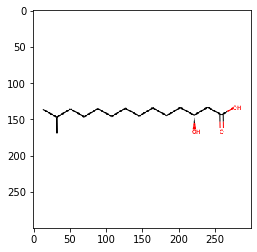

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


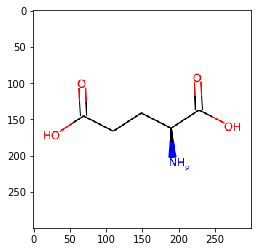

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


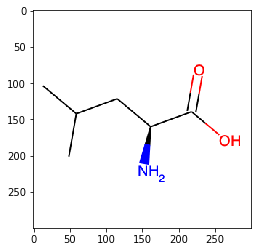

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


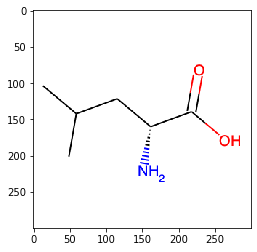

[[0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]]


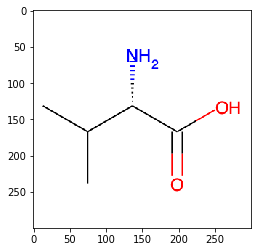

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


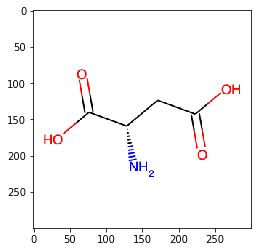

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


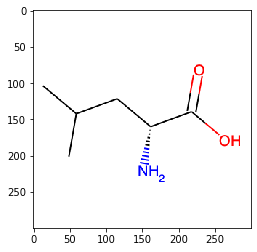

[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


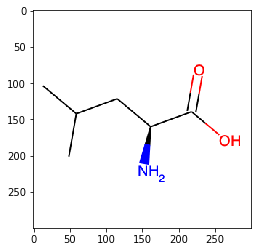

In [103]:
for f in fragments:
    
    print(Chem.GetAdjacencyMatrix(f))
    im = IPythonConsole.Draw.MolToImage(f)
    imshow(np.asarray(im))
    show()

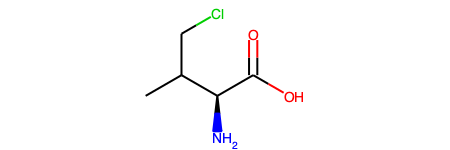

In [21]:
l = Chem.MolFromSmiles('C(CCl)(C)[C@@H](C(=O)O)N')
l


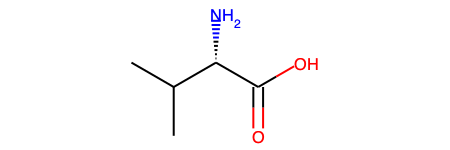

In [11]:
v = Chem.MolFromSmiles('CC(C)[C@@H](C(=O)O)N')
v

In [73]:
if l.GetSubstructMatches(Chem.MolFromSmiles('C[OH]')) != v.GetSubstructMatches(Chem.MolFromSmiles('C[OH]')):
    print('Yes!')
else:
    print('No!')
    

Yes!


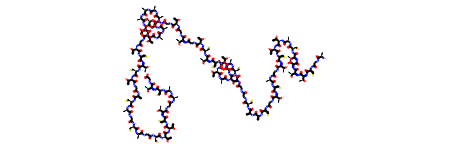

In [35]:
a = Chem.MolFromFASTA('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTCTCTGACAGCAGCTTCTGAACTG')
a


In [13]:
l = Chem.Graphs.CharacteristicPolynomial(l)


AttributeError: module 'rdkit.Chem' has no attribute 'Graphs'